# Predicting heart disease using machine learning

The following are the features we'll use to predict our target variable (heart disease or no heart disease).

1. age - age in years 
2. sex - (1 = male; 0 = female) 
3. cp - chest pain type 
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
    * anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl 
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        - can range from mild symptoms to severe problems
        - signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        - Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved 
9. exang - exercise induced angina (1 = yes; 0 = no) 
10. oldpeak - ST depression induced by exercise relative to rest 
    * looks at stress of heart during excercise
    * unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy 
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising 
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)


## Preparing the tools
We're going to use pandas,numpy and matplotlib for data analysis

In [1]:
# Regular EDA and plotting libraries
import numpy as np # np is short for numpy
import pandas as pd # pandas is so commonly used, it's shortened to pd
import matplotlib.pyplot as plt
import seaborn as sns # seaborn gets shortened to sns

# We want our plots to appear in the notebook
%matplotlib inline 

## Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

## Load data

In [2]:
df =pd.read_csv("heart (1).csv")
df.shape # (rows,columns)

(1025, 14)

## Data Exploration(Exploratory Data Analysis)

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [5]:

df["target"].value_counts()

target
1    526
0    499
Name: count, dtype: int64

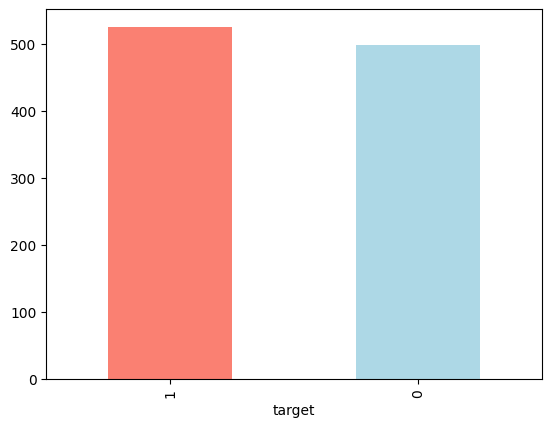

In [6]:
df["target"].value_counts().plot(kind="bar", color=["salmon","lightblue"]);

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [8]:
# are there any missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequecy according to sex

In [10]:
df.sex.value_counts()

sex
1    713
0    312
Name: count, dtype: int64

In [11]:
# Compare target column to sex column
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,86,413
1,226,300


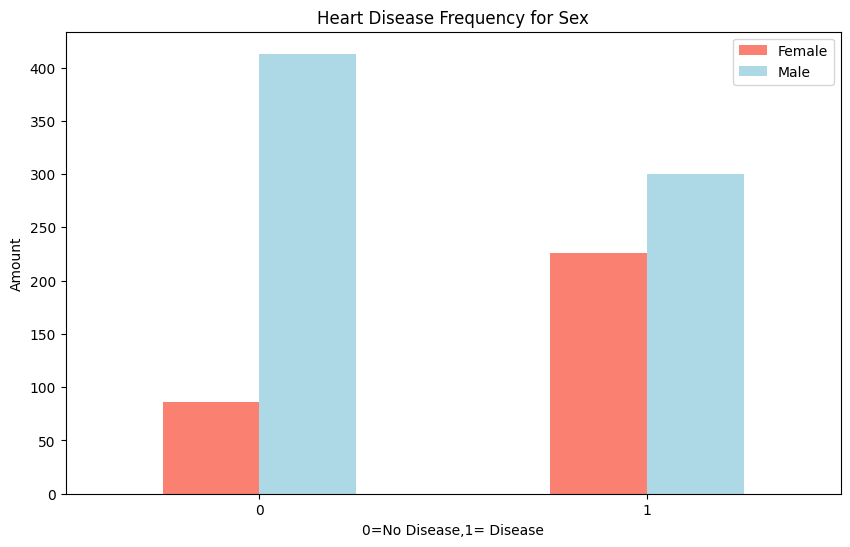

In [12]:
# create a plot of crosstab
pd.crosstab(df.target,df.sex).plot(kind="bar",
                                  figsize=(10,6),
                                 color=["salmon","lightblue"])
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0=No Disease,1= Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"])
plt.xticks(rotation =0);

### Age vs Max Heart Rate for Heart Disease

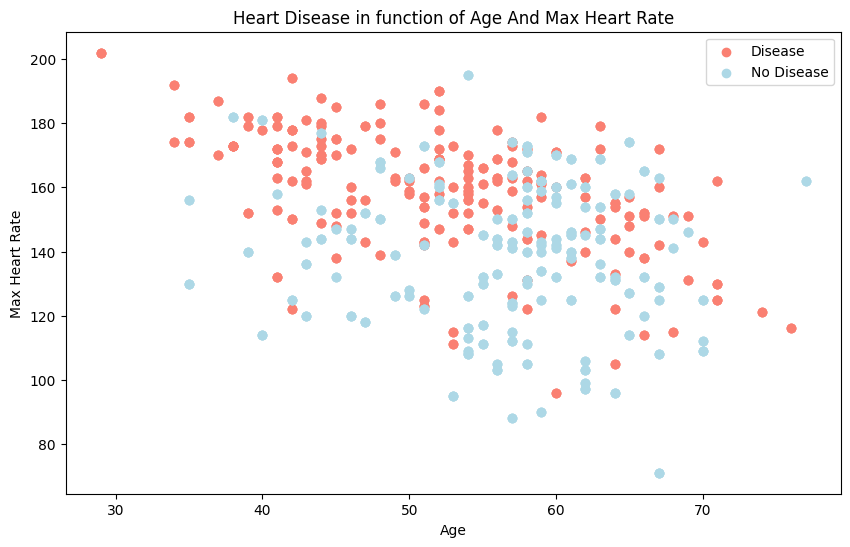

In [13]:
# create another figure
plt.figure(figsize=(10,6))

# Scatter with positive examples

plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           c="salmon")

# scatter with negative examples
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           c="lightblue")

#aadd some helpful info
plt.title("Heart Disease in function of Age And Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease","No Disease"]);

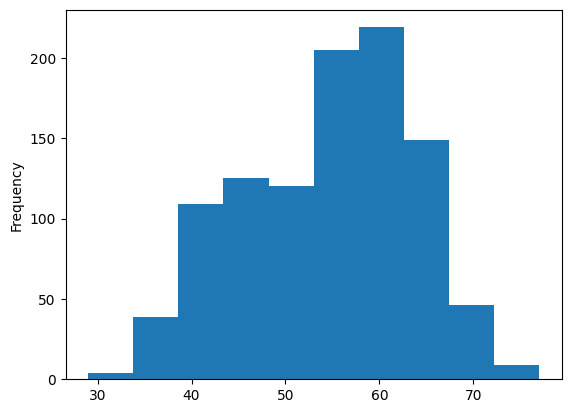

In [14]:
#check the distribution of the age column with a histogram
df.age.plot.hist();

## Heart Disease Frequency per Chest Pain Type

cp - chest pain type

0: Typical angina: chest pain related decrease blood supply to the heart

1: Atypical angina: chest pain not related to heart

2: Non-anginal pain: typically esophageal spasms (non heart related)

3: Asymptomatic: chest pain not showing signs of disease

In [15]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,375,122
1,33,134
2,65,219
3,26,51


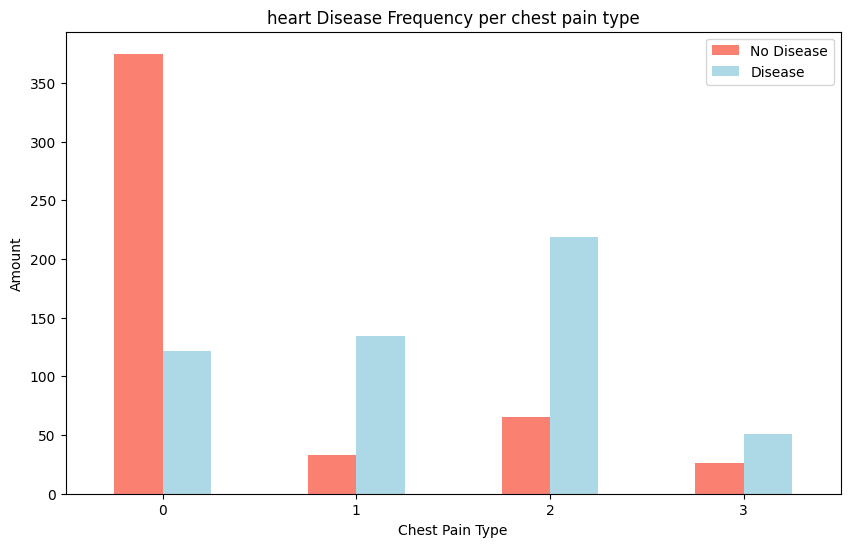

In [16]:
# Make the crosstab more visual
pd.crosstab(df.cp,df.target).plot(kind="bar",
                                 figsize=(10,6),
                                 color=["salmon","lightblue"])

plt.title("heart Disease Frequency per chest pain type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease","Disease"])
plt.xticks(rotation=0);

In [17]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [18]:
# Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


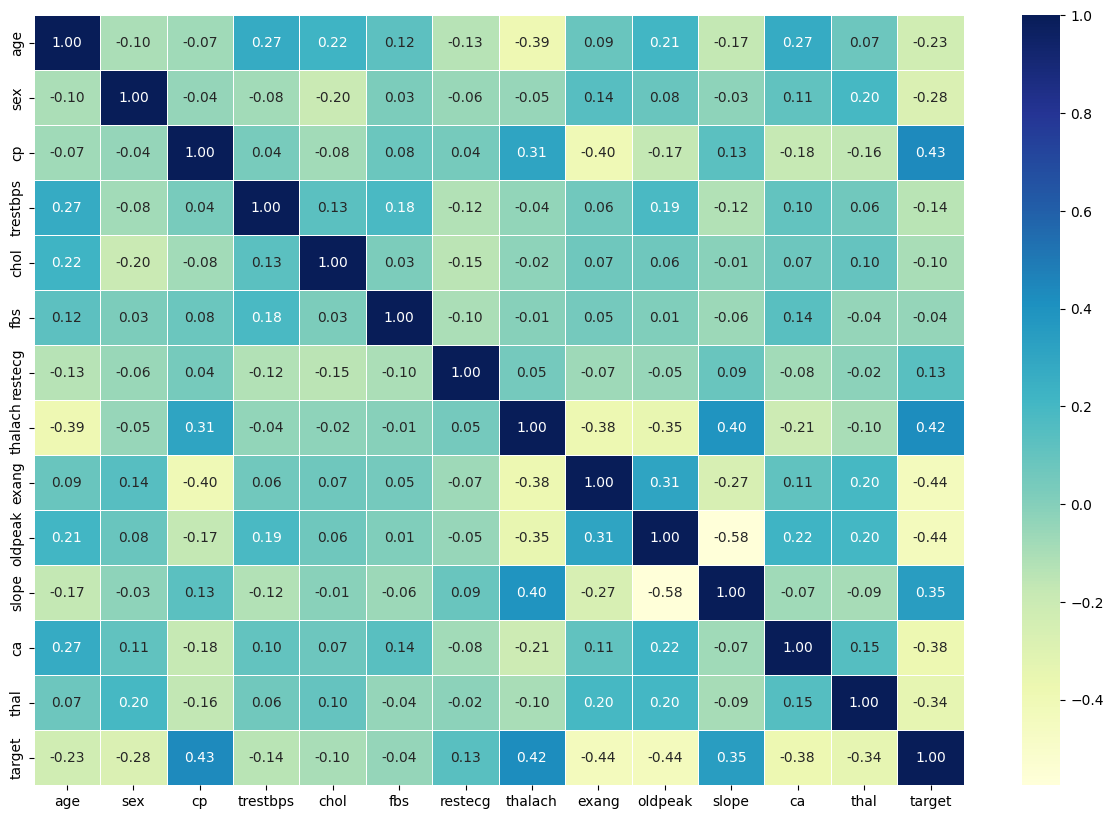

In [19]:
# lets' malke our correlation matrix more prettier
corr_matrix=df.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax= sns.heatmap(corr_matrix,
               annot = True,
               linewidth =0.5,
               fmt=".2f",
               cmap="YlGnBu");
#bottom,top = ax.get_ylim()
#ax.set_ylim(bottom +0.5,top=0.5)

## 5.Modelling

In [20]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [21]:
# Split the data into X and y
X =df.drop("target",axis=1)
y=df["target"]

In [22]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [23]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [24]:
# Split data into train and test set
#np.random.seed(42)

# Split in train and test
X_train,X_test,y_train,y_test = train_test_split(X,
                                                y,
                                                test_size=0.3,random_state=42)


In [25]:
#X_train

In [26]:
#y_train,len(y_train)

Now we've got our data split into0 training and test sets,it's time to build machine learning model

we'll train it(find the patterns ) on the training set.

And we'll test it(use the pattern)on the test set.

We're going to try three different machine learning models:

1. Logistic regression-https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

https://towardsdatascience.com/top-machine-learning-algorithms-for-classification-2197870ff501

2. K-Nearest Neighbours

3. RandomForestClassifier


In [27]:
# Put models in a dictionary
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(solver='lbfgs', max_iter=1000), 
          "Random Forest": RandomForestClassifier()}

# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [28]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

{'KNN': 0.7142857142857143,
 'Logistic Regression': 0.8051948051948052,
 'Random Forest': 0.9805194805194806}

## Model Comparison

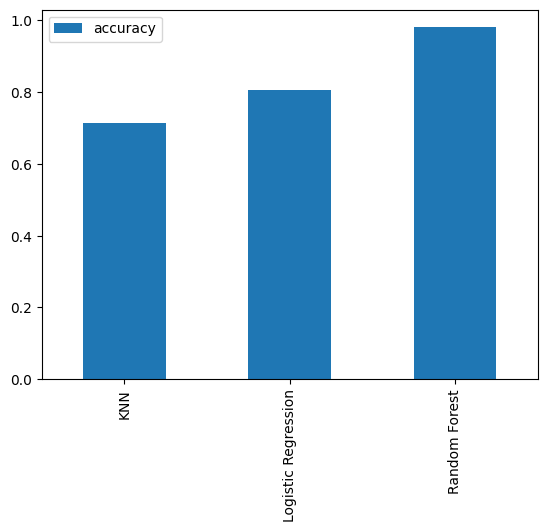

In [29]:
model_compare= pd.DataFrame(model_scores,index=["accuracy"])
model_compare.T.plot.bar();

Now we have got he baseline model..and we know a model's first predictions aren't always what we should based our nest steps off.


Hyperparameter tuning - Each model we use has a series of dials you can turn to dictate how they perform. Changing these values may increase or decrease model performance.


## Hyperparameter tuning

In [30]:
# Let's tune KNN

train_scores=[]
test_scores=[]

# create a list of different values for n_neighbors
neighbors=range(1,21)

# SEtup KNN instance
knn =KNeighborsClassifier()

#Loop through different n_neighbors

for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # fit the algorithm
    knn.fit(X_train,y_train)
    
    # update the training scores list
    train_scores.append(knn.score(X_train,y_train))
    
    #Update the test scores list
    
    test_scores.append(knn.score(X_test,y_test))
    

In [31]:
train_scores

[1.0,
 0.9902370990237099,
 0.9790794979079498,
 0.9079497907949791,
 0.8772663877266388,
 0.799163179916318,
 0.7838214783821479,
 0.7921896792189679,
 0.7796373779637378,
 0.7754532775453278,
 0.7852161785216178,
 0.7684797768479776,
 0.7698744769874477,
 0.7754532775453278,
 0.7656903765690377,
 0.7740585774058577,
 0.7642956764295676,
 0.7670850767085077,
 0.7656903765690377,
 0.7461645746164575]

In [32]:
test_scores

[0.9902597402597403,
 0.9448051948051948,
 0.8831168831168831,
 0.7954545454545454,
 0.7142857142857143,
 0.685064935064935,
 0.6785714285714286,
 0.7012987012987013,
 0.7272727272727273,
 0.7175324675324676,
 0.7272727272727273,
 0.724025974025974,
 0.711038961038961,
 0.7207792207792207,
 0.7077922077922078,
 0.7337662337662337,
 0.7142857142857143,
 0.724025974025974,
 0.7272727272727273,
 0.7207792207792207]

Maximum KNN score of the test data:99.03%


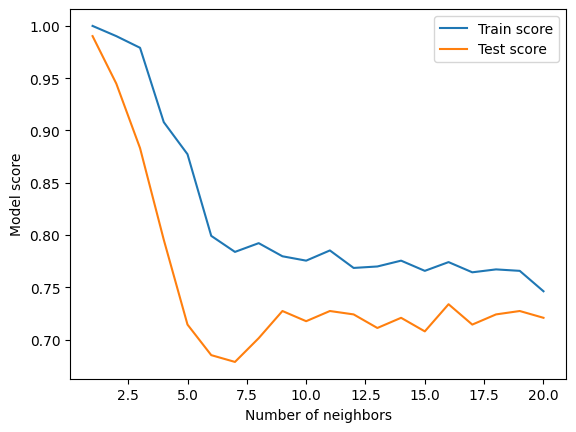

In [33]:
plt.plot(neighbors,train_scores,label ="Train score")
plt.plot(neighbors,test_scores,label="Test score")
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score of the test data:{max(test_scores)*100:.2f}%")

## Hyperparameter tuning with RandomizedSearchCV
we're going to tune:

* LogisticRegression()

* RandomForestClassifier()

...using RandomizedSearchCV

In [34]:
# create a hyperparameter grid for LogisticRegression
log_reg_grid ={"C":np.logspace(-4,4,20),
              "solver":["liblinear"]}
# create a hyperparameter grid for RandomForestclassifier
rf_grid={"n_estimators":np.arange(10,1000,50),
        "max_depth":[None,3,5,10],
        "min_samples_split":np.arange(2,20,2),
        "min_samples_leaf":np.arange(1,20,2)}


now we've got hyperparameter grid setup for each odf our models,let's tune them using 
RandomizedSearchCv

In [35]:
# Tune LogisticRegression()
#np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions = log_reg_grid,
                               cv=5,n_iter =20,
                               verbose= True)               #verbose= additional info (fitting 5 folds)
#Fit random hyperparameter search model for logisticRegression

rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [36]:
rs_log_reg.best_params_   #inbuild Parameter (.best_params_)

{'solver': 'liblinear', 'C': 4.281332398719396}

In [37]:
rs_log_reg.score(X_test,y_test)

0.8051948051948052

Now we've tuned logisticregression(),lets do the same for Randfomforest()


In [38]:
# setup random see
np.random.seed(42)

#setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions = rf_grid,
                          cv=5,
                          n_iter =20,           #5 splits 20 iterations
                          verbose =True)
# fit random hyperparameter search model for RandomForestClassifer()
rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [39]:
# find thye best hyperparameters
rs_rf.best_params_

{'n_estimators': 510,
 'min_samples_split': 14,
 'min_samples_leaf': 1,
 'max_depth': None}

In [40]:
# Evaluate the RandomizedSearch RandomForestClassifier model
rs_rf.score(X_test,y_test)

0.935064935064935

In [41]:
model_scores

{'KNN': 0.7142857142857143,
 'Logistic Regression': 0.8051948051948052,
 'Random Forest': 0.9805194805194806}

## Hyperparameter tuning using GridSearchCV

Since our LogisticReression model provides the best scores so far,we'll try and improve them agin using GridSearchCV

In [42]:
# Different hyperparameters for our Logisticregression model

log_reg_grid ={"C":np.logspace(-4,4,30),
              "solver":["liblinear"]}
# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid =log_reg_grid,
                         cv=5,
                         verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [43]:
#check the best hyperparameters
gs_log_reg.best_params_

{'C': 4.893900918477489, 'solver': 'liblinear'}

In [44]:
# Evaluate the grid search LogisticRegression model
gs_log_reg.score(X_test,y_test)

0.8051948051948052

In [45]:
model_scores

{'KNN': 0.7142857142857143,
 'Logistic Regression': 0.8051948051948052,
 'Random Forest': 0.9805194805194806}

## Evaluating our tuned machine learning classifier,beyond accuracy


In [46]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)

In [47]:
y_preds

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,

In [48]:
y_test

527    1
359    1
447    0
31     1
621    0
      ..
668    1
239    0
312    0
211    0
861    0
Name: target, Length: 308, dtype: int64

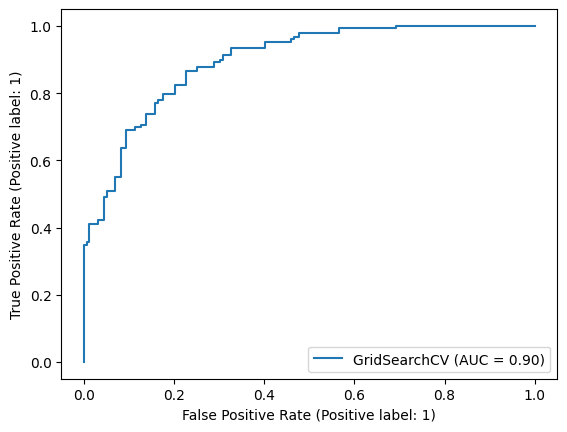

In [49]:
# plot ROC curve and calculate AUC metric
RocCurveDisplay.from_estimator(gs_log_reg,X_test,y_test);

In [50]:
# Confusionmatrix
print(confusion_matrix(y_test,y_preds))

[[119  40]
 [ 20 129]]


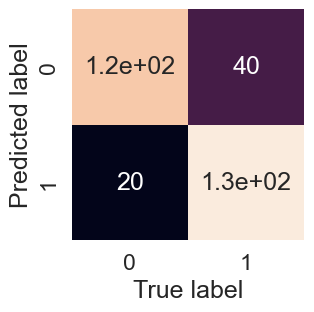

In [51]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test,y_preds):
    """
    Polts a nice looking confusion matrix using seaborn's heatmap()
 
    """
    fig,ax =plt.subplots(figsize =(3,3))
    ax= sns.heatmap(confusion_matrix(y_test,y_preds),
                   annot = True,
                    cbar =False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
plot_conf_mat(y_test,y_preds)

Now we've got a ROC curve,an AUC metric and confusion matrix,let's get a classification report
as well as cross-validated precision,recall and f1-score.


In [52]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.86      0.75      0.80       159
           1       0.76      0.87      0.81       149

    accuracy                           0.81       308
   macro avg       0.81      0.81      0.80       308
weighted avg       0.81      0.81      0.80       308



### calculate evaluation metrics using cross validation
We're going to calculate accuracy,precision,recall and f1-score of our model using cross-validation and to do so
we'll be using `cross_val_score()`

In [53]:
#Check best hyperparamters
gs_log_reg.best_params_

{'C': 4.893900918477489, 'solver': 'liblinear'}

In [54]:
# Create a new classifier with best parameters
clf = LogisticRegression(C=0.20433597178569418,
                         solver = "liblinear")

In [55]:
# cross validated accuracy
cv_acc = cross_val_score(clf,
                         X,
                         y,
                        cv = 5,
                         scoring ="accuracy")
cv_acc

array([0.87804878, 0.84878049, 0.88292683, 0.8195122 , 0.8       ])

In [56]:
cv_acc=np.mean(cv_acc)
cv_acc

0.8458536585365855

In [57]:
# cross validates precision
cv_precision = cross_val_score(clf,
                         X,
                         y,
                        cv = 5,
                         scoring ="precision")
cv_precision=np.mean(cv_precision)
cv_precision

0.8140908250785517

In [58]:
# cross validated recall
cv_recall = cross_val_score(clf,
                         X,
                         y,
                        cv = 5,
                         scoring ="recall")
cv_recall=np.mean(cv_recall)
cv_recall

0.9069362084456424

In [59]:
# cross-validated f1-score
cv_f1 = cross_val_score(clf,
                         X,
                         y,
                        cv = 5,
                         scoring ="f1")
cv_f1=np.mean(cv_f1)
cv_f1

0.8579960964556059

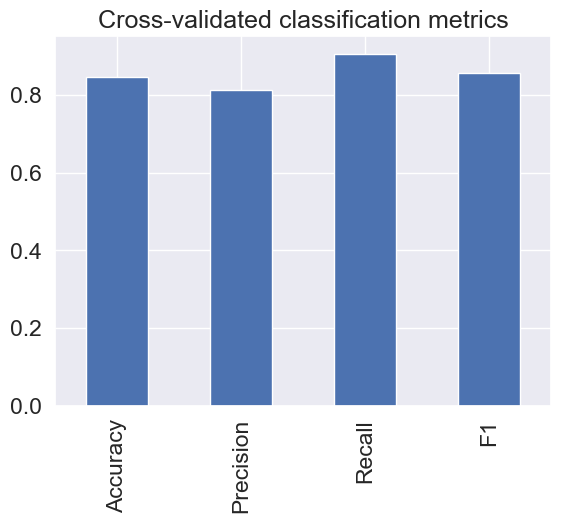

In [60]:
# visualize our cross-validated metrics
cv_metrics =pd.DataFrame({"Accuracy":cv_acc,
                         "Precision":cv_precision,
                         "Recall":cv_recall,
                         "F1":cv_f1},
                        index=[0])
cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                     legend = False );

### Feature Importance
Feature importance is another way of asking,"which features contributed most to the outcomes of the model and how did they contribute?"

finding feature importance is different foe each machine learning model.

Let's find feaqture importance for our Logistic Regression model...

In [61]:
# Fit an instance of LogisticRegression
#gs_log_reg.best_params_

clf = LogisticRegression(C = 0.20433597178569418,
                        solver = "liblinear")
clf.fit(X_train,y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [62]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [63]:
# check coef_
clf.coef_

array([[ 0.01834025, -1.26451711,  0.76884369, -0.01128846, -0.00911047,
        -0.17640623,  0.26700929,  0.03389559, -0.5444657 , -0.62558893,
         0.48658941, -0.69350664, -0.83932561]])

In [64]:
# Macth the features two columns
feature_dict =dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.018340248617627578,
 'sex': -1.2645171145395524,
 'cp': 0.7688436897556201,
 'trestbps': -0.01128845567240501,
 'chol': -0.00911047066698756,
 'fbs': -0.1764062271457092,
 'restecg': 0.26700929435655985,
 'thalach': 0.03389558705926123,
 'exang': -0.5444657047565676,
 'oldpeak': -0.6255889311204914,
 'slope': 0.4865894148880065,
 'ca': -0.6935066401341361,
 'thal': -0.8393256077947112}

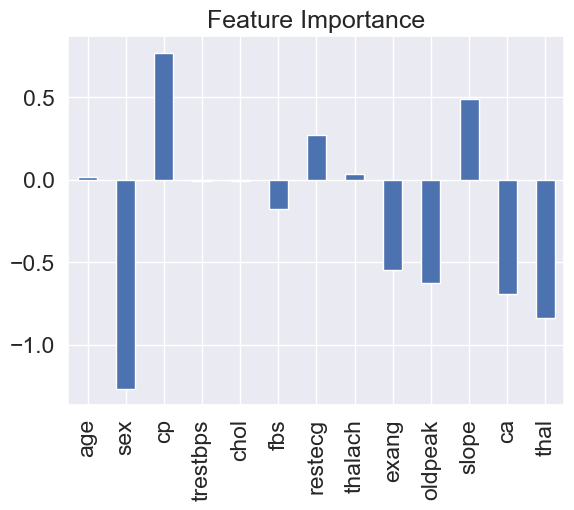

In [65]:
# visualize feature importance
feature_df =pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title="Feature Importance",legend=False);

In [66]:
pd.crosstab(df["sex"],df["target"])             #freq count

target,0,1
sex,,
0,86,226
1,413,300


In [67]:
pd.crosstab(df["slope"],df["target"])

target,0,1
slope,,
0,46,28
1,324,158
2,129,340


slope - the slope of the peak exercise ST segment

* 0: Upsloping: better heart rate with excercise (uncommon)

* 1: Flatsloping: minimal change (typical healthy heart)

* 2: Downslopins: signs of unhealthy heart

## 6.Experimentation

If you haven't hit your evaluation metric yet..ask yourself...

* could you collect more data?

* could you try a better model? Like catBoost or XGBoost?

* could you improve the current models?(beyong what ewe have done so far)

* If your model is good enough(you have hit your evaluation metric) how could you export it and share it with others?

In [68]:
import pickle
file = open('Heart1.pkl','wb')
pickle.dump(rs_rf,file)